In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Скачиваем данные о сделках

df = pd.read_csv('Data_coin_deals.csv')  

In [2]:
df[:5]

,Unnamed: 0,date_open,date_close,deal_type,price_open,price_close,qty,balance_before,balance_after,balance_after_max,balance_after_min,profit,profit_percent,balance_before_nofee,balance_after_nofee,profit_nofee,marker,marker1
0,0,1.503141e+09,1.503167e+09,1,282.68,295.00,100.0,100.000000,95.491715,101.505582,95.491715,-4.508285,-0.045083,-0.045083,0.015056,-0.894028,0,0.050427
1,1,1.503252e+09,1.503323e+09,0,300.53,345.27,100.0,95.491715,110.228748,110.232075,93.368534,14.737033,0.147370,0.147370,0.147404,3.741457,1,0.039388
2,2,1.503577e+09,1.503713e+09,0,328.04,324.41,100.0,110.228748,108.972176,113.200318,106.987661,-1.256572,-0.012566,-0.012566,0.029716,-0.322273,0,0.038991
3,3,1.503809e+09,1.503894e+09,0,338.29,335.34,100.0,108.972176,107.950143,112.579307,106.587407,-1.022033,-0.010220,-0.010220,0.036071,-0.444567,0,0.022989
4,4,1.503969e+09,1.504316e+09,0,351.01,385.05,100.0,107.950143,117.497872,120.138822,106.674819,9.547729,0.095477,0.095477,0.121887,3.115659,0,0.030644


In [3]:
first_list_needed_fitures = ['profit_percent']

In [4]:
predicts_=[]
facts_=[]

    
D_final = 0.7 # мнимальный коэффициент детерминации
needed_random = 0 # рандомноое значение c  лучшим результатом 


period = 5 # окно предыдущих сделок
X = df.loc[:726-period,:]
y = df.loc[period:,['profit_percent']]

X_new=[]

#Обучать сеть будем на окне предыдущих сделок

for i in range(0,len(X)-period,1):
    k1 = X.loc[i:i+period,first_list_needed_fitures].values

    X_new.append([item for sublist in k1 for item in sublist])

y_new = df.loc[period:,['profit_percent']] # Таргет-процент прибыли будущей сделки


In [5]:
train_size = 300
test_size = 100



X_train, X_test, y_train, y_test = X_new[:500], X_new[500:600], y_new[:500], y_new[500:600]
print('длина тестовых x и y', len(X_test),len(y_test))

# Z-масштабирование
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,y_train)



# Находим лучшее значение random
for j in range(0,200):

    regr = MLPRegressor(verbose = False,
            hidden_layer_sizes = (100,100,100,100,100,100,100,100,100,100,100,8),
            max_iter = 1000, random_state=j,
            tol=0.00001).fit(X_train, y_train.values.reshape(-1))

    D = regr.score(scaler.transform(X_test[:period*5]), y_test[:period*5])
 
  
    
    if D > D_final:  
        D_final = D
        needed_random = j

print('лучший коэффициент детерминации', round(D_final,2))




длина тестовых x и y 100 100
лучший коэффициент детерминации 1.0


In [6]:
# расчитываем предсказание

y_pred = regr.predict(scaler.transform(X_test[:100]))

In [7]:
# сравниваем реальные значения теста с рассчитанными
y_test[:10].values.ravel()

array([ 0.11860962, -0.03541917, -0.01585602, -0.04093022, -0.03029195,
        0.12965625, -0.02660448, -0.00370227, -0.02730196, -0.02033656])

In [8]:
y_pred[:10]

array([ 0.11696829, -0.02504661, -0.02092457, -0.04285756, -0.02669697,
        0.12816397, -0.02444291, -0.0014636 , -0.03044253, -0.01710106])

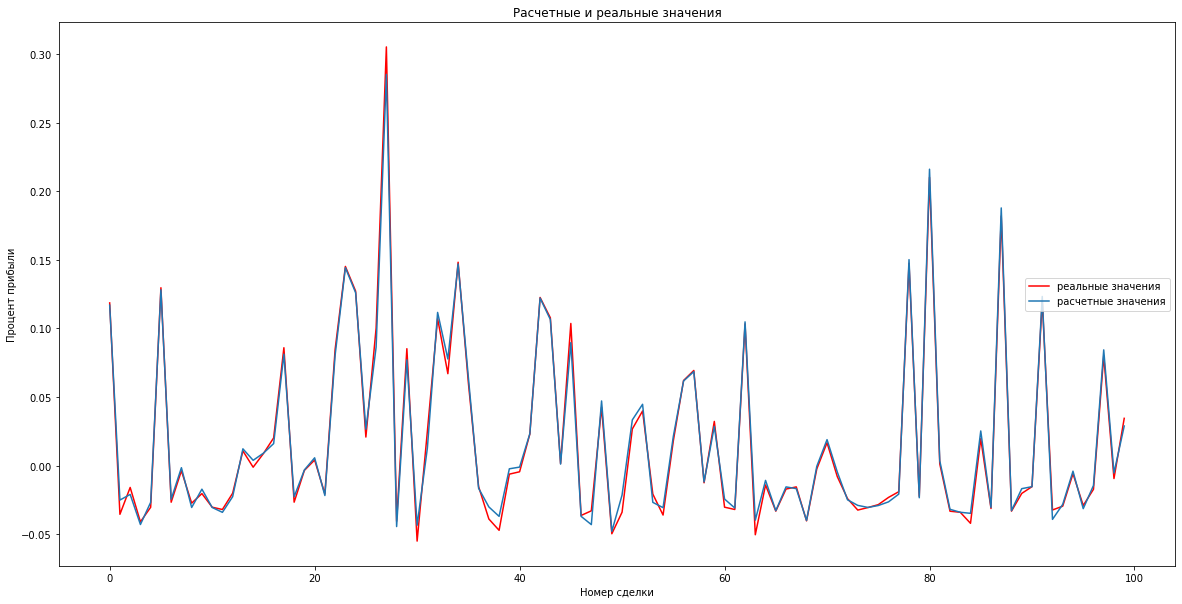

In [9]:
# Строим график для первых ста тестовых значених

plt.figure(figsize=(20,10))
plt.plot(np.arange(0,len(y_test.values.ravel())),y_test.values.ravel(),'red',label='реальные значения')
plt.plot(np.arange(0,len(y_pred)),y_pred, label='расчетные значения')
plt.legend(loc='right')
plt.title("Расчетные и реальные значения")
plt.xlabel("Номер сделки")
plt.ylabel("Процент прибыли")
plt.show()